# Package testing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

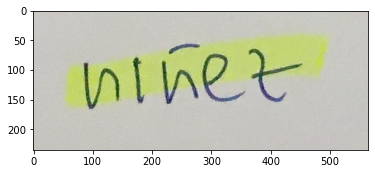

In [2]:
test = "../data-sources/spanish-words/w07_rgb_28.png"
image = imload(test)
plt.imshow(image)

## `preprocessing` pkg

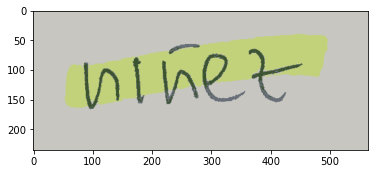

In [57]:
from preproc import Quantize

quantized_image = Quantize.reduce_palette(image, 4)
plt.imshow(quantized_image)

Wall time: 3.44 s


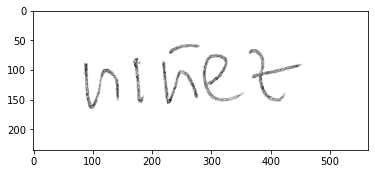

In [3]:
%%time
from preproc import RobustBinarize

bin_image = RobustBinarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 38.9 ms


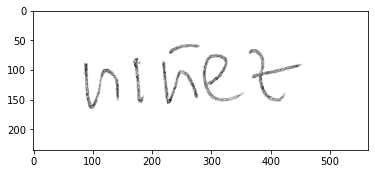

In [4]:
%%time
from preproc import RobustBinarize

bin_image = RobustBinarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 328 ms


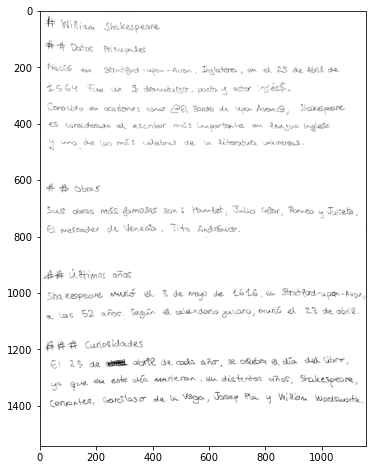

In [5]:
%%time
test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.33 s


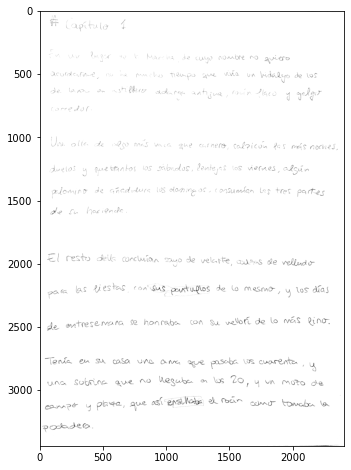

In [12]:
%%time
test = "../data-sources/spanish-words-originals/test1.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.47 s


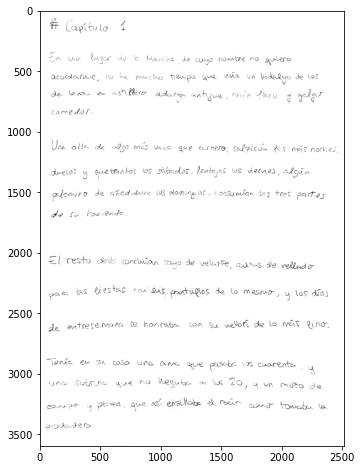

In [13]:
%%time
test = "../data-sources/spanish-words-originals/test2.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 800 ms


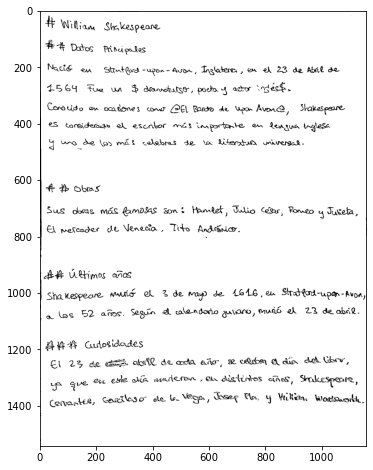

In [6]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.21 s


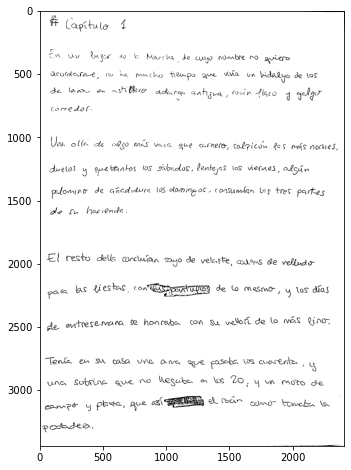

In [10]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.3 s


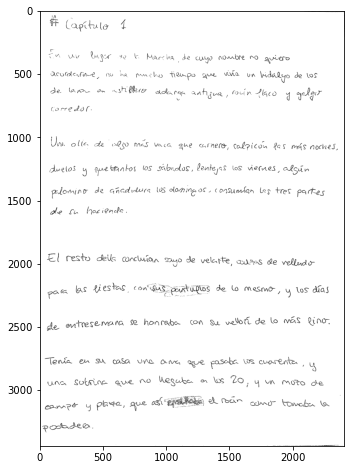

In [11]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.4 s


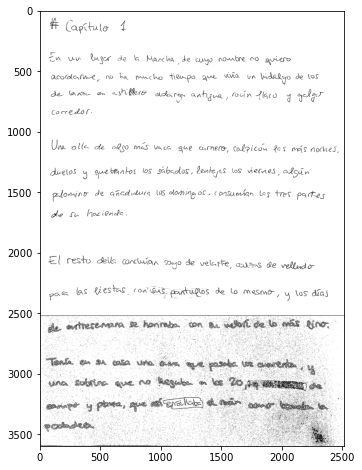

In [14]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.43 s


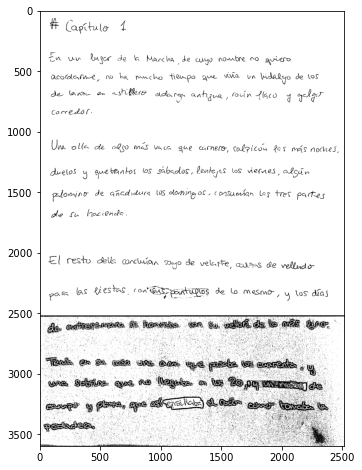

In [15]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=21)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 330 ms


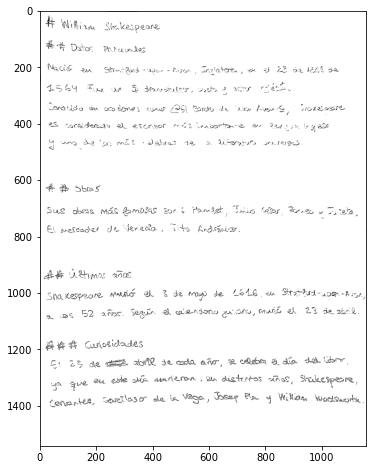

In [8]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=3)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [2]:
from preproc import ColorGroup

new_color = np.array([[182, 94, 101]])

model = ColorGroup()
model.predict(new_color)

'pink'

## `languages` pkg

In [2]:
from languages import LanguageTransformer, HTMLMinidownColorListener

LanguageTransformer(
    listener=HTMLMinidownColorListener,
    fpath="languages/examples/two.hmd",
    output_fpath="languages/tmp/hello.html"
)

In [4]:
from IPython.display import IFrame

IFrame(src='./languages/tmp/hello.html', width=700, height=300)

# `textRecognition` package

## `spanish-mini` dataset

A custom dataset of 258 samples.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

source_dir = "../packages/textRecognition/sample"
dest_dir = "../packages/textRecognition/sample/minified"

data = pd.read_csv(f"{source_dir}/all_words.txt", sep=" ", skiprows=27)
print(data.shape)
data.head(2)

(519, 10)


id  seg  bin  comp bb_x bb_y bb_w bb_h  tag     word
0  w01_bw_01  NaN  154   NaN    X    Y    W    H  NaN  pañuelo
1  w01_bw_02  NaN  154   NaN    X    Y    W    H  NaN  enseñar

In [2]:
data = data[data["id"].str.contains("bw")]
data["fpath"] = data["id"].apply(lambda x: f"{x}.png")

print(data.shape)
data.head(2)

(258, 11)


id  seg  bin  comp bb_x bb_y bb_w bb_h  tag     word          fpath
0  w01_bw_01  NaN  154   NaN    X    Y    W    H  NaN  pañuelo  w01_bw_01.png
1  w01_bw_02  NaN  154   NaN    X    Y    W    H  NaN  enseñar  w01_bw_02.png

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data["word"], test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, X_train["word"], test_size=0.1, random_state=42)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Valid set: {X_valid.shape}")

Train set: (185, 11)
Test set: (52, 11)
Valid set: (21, 11)


In [4]:
from textRecognition import TinyData

TinyData.minify(
    X_train, X_test, X_valid,
    source_dir=source_dir, target_path=f"{dest_dir}/spanish.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

Using TensorFlow backend.
185it [00:01, 155.88it/s]
52it [00:00, 110.32it/s]
21it [00:00, 110.24it/s]

Done


## `IAM-word` dataset

A custom dataset of 75602 samples.

In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

source_dir = "../data-sources/iam-word-dataset"
dest_dir = "../packages/textRecognition/sample/minified"

data = pd.read_csv(f"{source_dir}/words.txt", sep=" ", skiprows=18, names=["id", "seg", "bin", "bb_x", "bb_y", "bb_w", "bb_h", "tag", "word"])
print(data.shape)
data.head(2)

(75604, 9)


id seg  bin  bb_x  bb_y  bb_w  bb_h tag  word
0  a01-000u-00-00  ok  154   408   768    27    51  AT     A
1  a01-000u-00-01  ok  154   507   766   213    48  NN  MOVE

In [32]:
def id_to_fpath(_id: str):
    form_group, form_id, _, _ = _id.split("-")
    return f"{form_group}/{form_group}-{form_id}/{_id}.png"
    
data["fpath"] = data["id"].apply(id_to_fpath)
data["line_id"] = data["id"].apply(lambda x: x[:-3])

print(data.shape)
data.head(2)

(75604, 11)


id seg  bin  bb_x  bb_y  bb_w  bb_h tag  word  \
0  a01-000u-00-00  ok  154   408   768    27    51  AT     A   
1  a01-000u-00-01  ok  154   507   766   213    48  NN  MOVE   

                             fpath      line_id  
0  a01/a01-000u/a01-000u-00-00.png  a01-000u-00  
1  a01/a01-000u/a01-000u-00-01.png  a01-000u-00

In [33]:
filter_empty_files = data["fpath"].apply(lambda x: os.path.getsize(f"{source_dir}/{x}") > 0)
data = data[filter_empty_files]

print(data.shape)
data.head(2)

(75602, 11)


id seg  bin  bb_x  bb_y  bb_w  bb_h tag  word  \
0  a01-000u-00-00  ok  154   408   768    27    51  AT     A   
1  a01-000u-00-01  ok  154   507   766   213    48  NN  MOVE   

                             fpath      line_id  
0  a01/a01-000u/a01-000u-00-00.png  a01-000u-00  
1  a01/a01-000u/a01-000u-00-01.png  a01-000u-00

In [44]:
splits_dir = "../data-sources/iam-word-dataset/largeWriterIndependentTextLineRecognitionTask"

train_set_ids = pd.read_csv(f"{splits_dir}/trainset.txt", names=["id"])
test_set_ids = pd.read_csv(f"{splits_dir}/testset.txt", names=["id"])
valid1_set_ids = pd.read_csv(f"{splits_dir}/validationset1.txt", names=["id"])
valid2_set_ids = pd.read_csv(f"{splits_dir}/validationset2.txt", names=["id"])

print(train_set_ids.shape)
train_set_ids.head(2)

(6161, 1)


id
0  a01-000u-00
1  a01-000u-01

In [45]:
filter_train, filter_test, filter_valid = False, False, False

for _, row in train_set_ids.iterrows():
    filter_train = filter_train | (data["line_id"] == row.id)
    
for _, row in test_set_ids.iterrows():
    filter_test = filter_test | (data["line_id"] == row.id)
    
for _, row in valid1_set_ids.iterrows():
    filter_valid = filter_valid | (data["line_id"] == row.id)
    
for _, row in valid2_set_ids.iterrows():
    filter_valid = filter_valid | (data["line_id"] == row.id)

In [46]:
train_set = data[filter_train]
test_set = data[filter_test]
valid_set = data[filter_valid]

print(train_set.shape, test_set.shape, valid_set.shape)

(41574, 11) (6443, 11) (13900, 11)


In [47]:
from textRecognition import TinyData

TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=source_dir, target_path=f"{dest_dir}/iam.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

41574it [01:56, 356.93it/s]
6443it [00:16, 389.86it/s]
13900it [00:47, 293.27it/s]

Done


# `next` package